<a href="https://www.kaggle.com/code/ehetshamshaukat/car-purchase-decision-analysis-and-model?scriptVersionId=104671351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import plotly 
from plotly import graph_objs as go
from plotly import express as px
from plotly import offline

# Importing data

In [2]:
dataset=pd.read_csv("/kaggle/input/cars-purchase-decision-dataset/car_data.csv")

# Reading Data

In [3]:
dataset.sample(5)

,User ID,Gender,Age,AnnualSalary,Purchased
180,786,Female,60,35500,1
293,26,Female,47,47000,0
277,673,Male,38,81500,0
768,784,Female,53,143000,1
870,804,Female,48,145500,1


# Preprocessing 

In [4]:
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
dataset.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [6]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [7]:
dataset["Purchased"].replace([0,1],["No","Yes"],inplace=True)

In [8]:
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,No
1,681,Male,40,43500,No
2,353,Male,49,74000,No
3,895,Male,40,107500,Yes
4,661,Male,25,79000,No


# Reuseable Code

In [9]:
def create_pie(name,title,text):
    values=name.values
    labels=name.index
    trace0=go.Pie(values=values,labels=labels,textposition="inside",textinfo="label+percent+value",hole=0.4)
    data=[trace0]
    layout=dict(title=title,title_x=0.5,annotations=[dict(text=text,x=0.5,y=0.5,showarrow=False,font_size=14)])
    fig=dict(data=data,layout=layout)
    offline.iplot(fig)

In [10]:
def create_sunburst(df,path:list,values,title):
    fig=px.sunburst(df,path=path,values=values)
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

# Analyzing

### Basic analyzing

In [11]:
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,No
1,681,Male,40,43500,No
2,353,Male,49,74000,No
3,895,Male,40,107500,Yes
4,661,Male,25,79000,No


In [12]:
dataset.shape

(1000, 5)

In [13]:
dataset.describe()

,User ID,Age,AnnualSalary
count,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000
std,288.819436,10.707073,34488.341867
min,1.000000,18.000000,15000.000000
25%,250.750000,32.000000,46375.000000
50%,500.500000,40.000000,72000.000000
75%,750.250000,48.000000,90000.000000
max,1000.000000,63.000000,152500.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [15]:
dataset.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased       object
dtype: object

## Advance Analysis

In [16]:
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
gender_count=dataset["Gender"].value_counts()
gender_count

Female    516
Male      484
Name: Gender, dtype: int64

In [18]:
create_pie(gender_count,"Gender Distribution","Ratio")

In [19]:
gender_vs_purchased=dataset.groupby(["Gender","Purchased"]).agg(total_purchased=("Purchased","count")).reset_index()
gender_vs_purchased

,Gender,Purchased,total_purchased
0,Female,No,297
1,Female,Yes,219
2,Male,No,301
3,Male,Yes,183


In [20]:
create_sunburst(gender_vs_purchased,["Gender","Purchased","total_purchased"],"total_purchased","Gender Vs. Purchased")

In [21]:
dataset.groupby(["Gender","Purchased"]).agg(min_salary=("AnnualSalary","min"),max_salary=("AnnualSalary","max"),average_salary=("AnnualSalary","mean")).reset_index()

,Gender,Purchased,min_salary,max_salary,average_salary
0,Female,No,15000,136500,63619.528620
1,Female,Yes,20000,151500,89968.036530
2,Male,No,15000,143500,61144.518272
3,Male,Yes,20000,152500,85718.579235


# Machine learning

 # Importing Libraries

In [22]:
import pandas as pd    
import numpy as np    
from sklearn.preprocessing import LabelEncoder    
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay   

 # Reading Data

In [23]:
data_for_ml=pd.read_csv("/kaggle/input/cars-purchase-decision-dataset/car_data.csv")
data_for_ml.sample(5)

,User ID,Gender,Age,AnnualSalary,Purchased
295,704,Male,34,44500,0
900,14,Male,47,60500,0
343,84,Male,37,74000,0
57,348,Female,49,98500,0
969,721,Male,29,148000,1


 # Preprocessing

In [24]:
data_for_ml.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [25]:
data_for_ml.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [26]:
data_for_ml.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [27]:
data_for_ml.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [28]:
le=LabelEncoder()
data_for_ml["Gender"]=le.fit_transform(data_for_ml["Gender"]) # 1 for male and 0 for female
data_for_ml.sample(5)

,User ID,Gender,Age,AnnualSalary,Purchased
172,742,1,26,81000,0
454,871,1,31,50500,0
109,775,1,43,109500,1
370,383,1,48,24500,1
3,895,1,40,107500,1


In [29]:
data_for_ml.dtypes

User ID         int64
Gender          int64
Age             int64
AnnualSalary    int64
Purchased       int64
dtype: object

# Reusebale Code

In [30]:
def model_evaluation(df,trueval,predval,modelname):
    """ Model evaluation"""
    print(modelname)
    acc=accuracy_score(df[trueval],df[predval])
    pres=precision_score(df[trueval],df[predval])
    recal=recall_score(df[trueval],df[predval])
    print("Accuracy score is ",acc)
    print("Precision score is ",pres)
    print("Recall score is ",recal)

In [31]:
def conmatdisplay(col,trueval,predval):
   result = ConfusionMatrixDisplay.from_predictions(col[trueval],col[predval])
   result

 # Spliting data

In [32]:
x=data_for_ml.drop("Purchased",axis=1)
y=data_for_ml["Purchased"]
print("Row and column of x is: ",x.shape)
print("Row and column  of y is: ",y.shape)

Row and column of x is:  (1000, 4)
Row and column  of y is:  (1000,)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("Row and column of x_train is:",x_train.shape)
print("Row and column of y_train is:",y_train.shape)
print("Row and column of x_test is:",x_test.shape)
print("Row and column of y_test is:",y_test.shape)

Row and column of x_train is: (800, 4)
Row and column of y_train is: (800,)
Row and column of x_test is: (200, 4)
Row and column of y_test is: (200,)


 # Modeling Training

* #### Modeling training using Logistic Regression

In [34]:
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

* #### Modeling training using Support Vector Machine

In [35]:
svm=SVC(max_iter=1000)
svm.fit(x_train,y_train)

SVC(max_iter=1000)

* #### Modeling training using K Neighbors Classifier

In [36]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)

KNeighborsClassifier()

 # Prediction using train model

* #### prediction using Logistics Regression

In [37]:
predicted_value_lr=lr.predict(x_test)
predicted_value_lr

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0])

* #### prediction using Support Vector Machine

In [38]:
predicted_value_svm=svm.predict(x_test)
predicted_value_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0])

In [39]:
predicted_value_knc=knc.predict(x_test)
predicted_value_knc

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1])

# Model Comparison

In [40]:
comparing=pd.DataFrame({"Actual Value":y_test,"Predicted Value Using LR":predicted_value_lr,"Predicted Value Using SVM":predicted_value_svm,"Predicted Value Using KNC":predicted_value_knc})
comparing.sample(10)

,Actual Value,Predicted Value Using LR,Predicted Value Using SVM,Predicted Value Using KNC
845,0,0,0,1
78,1,1,1,1
919,1,0,0,0
463,1,0,1,1
114,1,1,1,1
879,1,1,1,1
926,0,0,0,0
176,1,1,0,0
933,0,0,0,0
911,1,0,1,0


# Model Evaluation

* #### Model evaluation of LogisticRegression

In [41]:
model_evaluation(comparing,"Actual Value","Predicted Value Using LR","Logistics Regression")

Logistics Regression
Accuracy score is  0.76
Precision score is  0.7464788732394366
Recall score is  0.6385542168674698


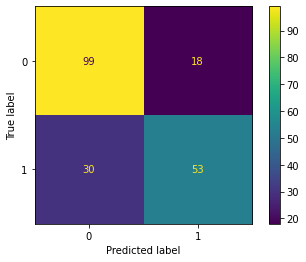

In [42]:
conmatdisplay(comparing,"Actual Value","Predicted Value Using LR")

* #### Model evaluation using Support Vector Machine

In [43]:
model_evaluation(comparing,"Actual Value","Predicted Value Using SVM","Support Vector Machine")

Support Vector Machine
Accuracy score is  0.765
Precision score is  0.9090909090909091
Recall score is  0.4819277108433735


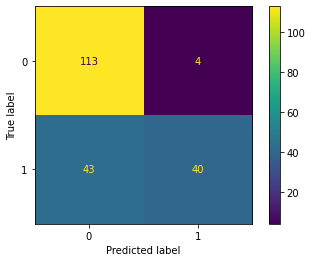

In [44]:
conmatdisplay(comparing,"Actual Value","Predicted Value Using SVM")

* #### Model evaluation using K Neighbors Classifier

In [45]:
model_evaluation(comparing,"Actual Value","Predicted Value Using KNC","K Neighbors Classifier")

K Neighbors Classifier
Accuracy score is  0.76
Precision score is  0.7536231884057971
Recall score is  0.6265060240963856


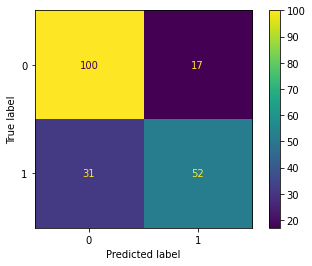

In [46]:
conmatdisplay(comparing,"Actual Value","Predicted Value Using KNC")